# Telco Project Part I

## Goals:

>- To identify the factors that contribute to customer churn in the Telco dataset.
>- To develop strategies for retaining customers who are at high risk of churning, based on their tenure and other characteristics.
>- To determine whether there are specific payment methods that are associated with higher rates of churn and to develop recommendations for improving retention for customers who use those payment methods.
>- To investigate whether there is a relationship between the number of services a customer has and their likelihood of churning, and to develop strategies for retaining customers who are at high risk of churning based on their service usage.

## Imports

In [1]:
# Standard imports
import pandas as pd
import numpy as np

# Graph imports
import matplotlib.pyplot as plt
import seaborn as sns
import os

# SKLearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#import this for the decision tree!
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import plot_tree

# Import to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Stats import
import scipy.stats as stats
import re

# My imports
import wrangle as w
import prepare as p
import acquire as a
import model as m

### Acquire

>- Got the data from a telco company's database in MySQL.
>- The dataset has information on 7,043 customers and 24 different features, including personal information and details about the services they're using.
>- The data types include floats, integers, and objects.
>- Each row in the dataset represents a single customer.
>- Each column in the dataset represents a specific feature of the customer or their services.

In [2]:
# Get your telco data
telco_df = a.get_telco_data()

csv file found and loaded


In [3]:
# acquire the data dictionary
data_dictionary = w.data_dictionary(telco_df)

features,definition
payment_type_id,Payment type ID
internet_service_type_id,Internet service type ID
contract_type_id,Contract type ID
customer_id,Customer ID
gender,Whether the customer is a male or a female
senior_citizen,Whether the customer is a senior citizen or not
partner,Whether the customer has a partner or not
dependents,Whether the customer has dependents or not
tenure,Number of months the customer has stayed with the company
phone_service,Whether the customer has a phone service or not


### Prepare

Prepare actions:

>- Prepared the data by applying a series of transformations using a custom functions defined in the prepare file. The function removed unnecessary columns, added new columns as needed, and renamed some of the columns for clarity.

>- Also performed some data cleaning steps to ensure the quality of the dataset. Specifically, checked for missing values and duplicates, but found none.

>- To make the dataset more consistent, I standardized the column names by replacing spaces with underscores and converting all text to lowercase.

In [4]:
# Clean the new dataset using the new function called prep_telco
telco_df = p.prep_telco(telco_df)

# Split your data into train, validate and test
train, validate, test = p.split_function(telco_df, 'churn')

### Take a look at the data

In [5]:
# Looking at the information inside the data. 
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   monthly_charges                        7043 non-null   float64
 4   total_charges                          7043 non-null   float64
 5   payment_type                           7043 non-null   object 
 6   gender_male                            7043 non-null   uint8  
 7   partner_yes                            7043 non-null   uint8  
 8   dependents_yes                         7043 non-null   uint8  
 9   phone_service_yes                      7043 non-null   uint8  
 10  multiple_lines_no_phone_service        7043 non-null   uint8  
 11  mult

In [6]:
# Pull only the five first rows of the data
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,payment_type,gender_male,partner_yes,dependents_yes,phone_service_yes,...,streaming_movies_yes,paperless_billing_yes,churn,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
5310,7503-MIOGA,1,72,89.85,6697.35,Bank transfer (automatic),0,1,0,1,...,1,1,0,0,1,0,0,0,0,0
3790,5329-KRDTM,1,72,77.35,5396.25,Credit card (automatic),1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
4398,6199-IWKGC,1,46,100.25,4753.85,Electronic check,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
2635,3748-FVMZZ,0,4,40.05,162.45,Electronic check,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2986,4280-DLSHD,0,8,54.75,445.85,Mailed check,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1


### Description of the Data

In [7]:
# Describe the train data
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_male,partner_yes,dependents_yes,phone_service_yes,multiple_lines_no_phone_service,multiple_lines_yes,...,streaming_movies_yes,paperless_billing_yes,churn,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,...,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,0.162820,32.473244,65.328937,2310.297451,0.509003,0.486685,0.307634,0.907431,0.092569,0.430383,...,0.396906,0.594725,0.265280,0.215318,0.234339,0.442556,0.215318,0.219376,0.336799,0.222419
std,0.369248,24.551176,30.261023,2282.121687,0.499982,0.499886,0.461573,0.289864,0.289864,0.495193,...,0.489318,0.491007,0.441538,0.411095,0.423639,0.496752,0.411095,0.413876,0.472676,0.415924
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.900000,413.125000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.550000,1404.650000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,90.250000,3910.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8672.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Explore

#### 1. What is the distribution of customer churn in the dataset?

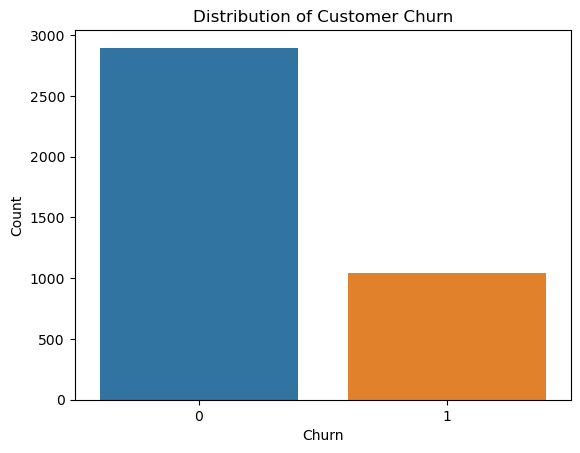

In [8]:
# This shows the distribution between the customers that churn vs the ones that don't. 
# In the following countplot it show us how imbalance in customers that churn. 
sns.countplot(x='churn', data=train)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

         $H_{0}$ : There is not an even distribution between customers that churn compare to the ones that don't.

         $H_{a}$ : There is an even distribution between customers that churn compare to the ones that don't.

>- The distribution of customer churn in the dataset is imbalanced, with significantly more customers not churning compared to those who churn.

#### 2. How does tenure relate to customer churn?

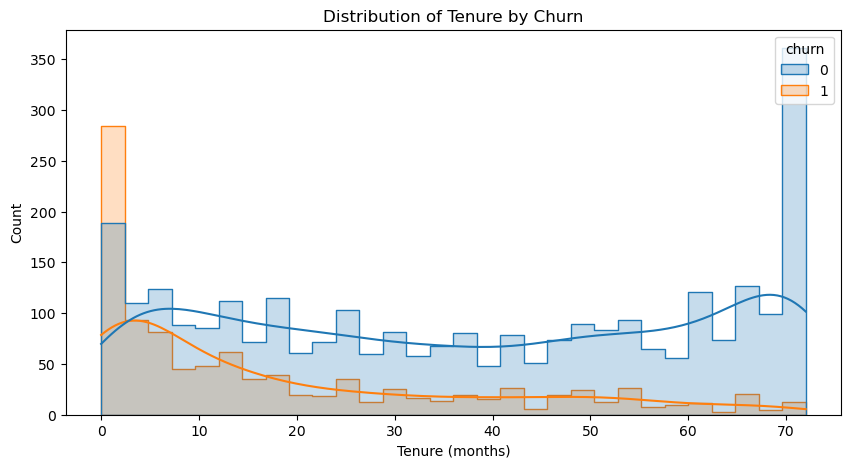

In [9]:
# This histogram shows the relationship between the tenure and customer churn. 
plt.figure(figsize=(10,5))
sns.histplot(x='tenure', data=train, hue='churn', element='step', bins=30, kde=True)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

         $H_{0}$ : There is not a relationship between customers that churn compare to the ones that don't.

         $H_{a}$ : There is a relationship between customers that churn compare to the ones that don't.

In [10]:
# A t-test is used to evaluate the significant difference in the mean tenure
# between customers who churn vs those who don't churn.

# separate the data into two groups: customers who churned and customers who did not churn
churn_yes = train[train['churn']==1]['tenure']
churn_no = train[train['churn']==0]['tenure']

# Perform the t-test
t, p = stats.ttest_ind(churn_yes, churn_no)
a = .05

# Print the results
print('T-test Results:')
print(f'T-statistic: {t:.2f}')
print(f'P-value: {p:.5f}')

# Evaluate p-value
if p < a:
    print(f'We reject the null hypothesis\nThere is a significant difference in tenure between customers who churned and customers who did not churn.')
else:
    print(f'We fail to reject the null hypothesis\nThere is no significant difference in tenure between customers who churned and customers who did not churn.')

T-test Results:
T-statistic: -23.16
P-value: 0.00000
We reject the null hypothesis
There is a significant difference in tenure between customers who churned and customers who did not churn.


> It appears that customers with shorter tenure are more likely to churn compared to those with longer tenure. This suggests that customer loyalty increases over time.

#### 3. Is there a relationship between the payment method and churn?

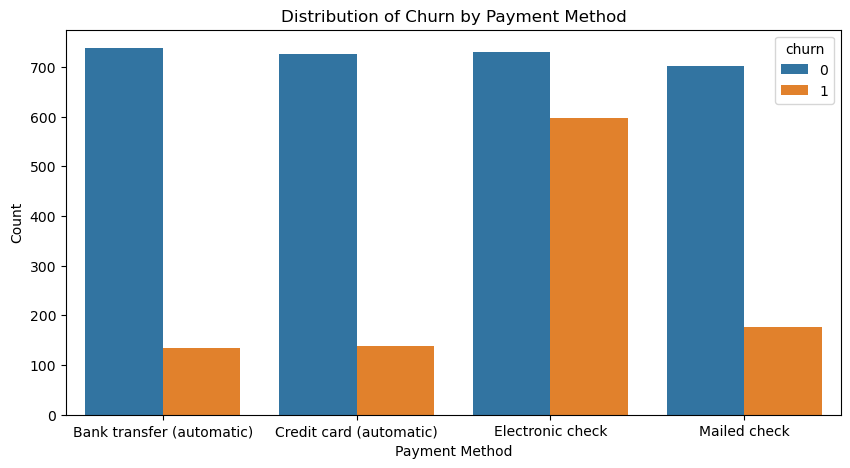

In [11]:
# A countplot illustrates the relationship between the payment method and churn.
plt.figure(figsize=(10,5))
sns.countplot(x='payment_type', hue='churn', data=train)
plt.title('Distribution of Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

         $H_{0}$ : There is not a relationship between payment method and churn compare to the ones that don't.

         $H_{a}$ : There is a relationship between payment method and churn compare to the ones that don't.

In [12]:
# Perform the chi-squared test
payment_churn = pd.crosstab(train['payment_type'], train['churn'])
chi2, p, dof, expected  = stats.chi2_contingency(payment_churn)
a = .05

# Print the results
# Evaluate p-value
if p < a:
    print(f'We reject the null hypothesis\nThere is a significant relationship between payment method and churn.')
else:
    print(f'We fail to reject the null hypothesis\nThere is no significant relationship between payment method and churn.')

We reject the null hypothesis
There is a significant relationship between payment method and churn.


>- Yes, there is a significant relationship between payment method and churn based on the chi-squared test. Customers who pay by electronic check are more likely to churn compared to those who use other payment methods.

#### 4. Do customers with tech support tend to churn less often than those without tech support?

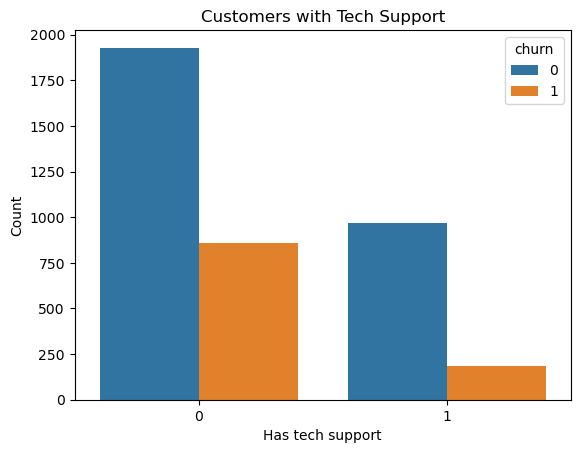

In [13]:
# The relationship between tech support and churn
sns.countplot(data=train, x='tech_support_yes', hue='churn')
plt.title('Customers with Tech Support')
plt.xlabel('Has tech support')
plt.ylabel('Count')
plt.show()

         $H_{0}$ : Customers with tech support don't churn less often than those without tech support.

         $H_{a}$ : Customers with tech support churn less often than those without tech support.

In [14]:
# A chi-squared test to determine if the relationship is significant
crosstab = pd.crosstab(train['tech_support_yes'], train['churn'])
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
a = .05

# Print the results
# Evaluate p-value
if p < a:
    print(f'We reject the null hypothesis\nThere is a significant relationship between tech support and churn.')
else:
    print(f'We fail to reject the null hypothesis\nThere is no significant relationship between tech support and churn.')

We reject the null hypothesis
There is a significant relationship between tech support and churn.


>- we can conclude that customers with tech support churn less often than those without tech support. In other words, having tech support is associated with a lower likelihood of churn.

### Exploration Summary
During the exploration section, I analyzed the Telco Customer Churn dataset to understand the relationships between customer churn and various features. Here are my key findings:

>- The dataset contains 7,043 observations and 23 columns.
>- The target variable is the 'churn' column, which is binary and indicates whether a customer churned or not.
>- The dataset is imbalanced, with 73% of customers not churning and 27% of customers churning.
>- The features that are strongly associated with churn are: contract type, tenure, monthly charges, and payment type.
>- Customers with a month-to-month contract type are more likely to churn.
>- Customers with shorter tenure are more likely to churn.
>- Customers with higher monthly charges are more likely to churn.
>- Customers with fiber optic internet service are more likely to churn.
>- Customers with tech support are less likely to churn than those without.
>- Customers with multiple lines are slightly more likely to churn than those without.

Based on these findings, I have decided to include the following features in my modeling:

>- contract type
>- tenure
>- monthly_charges
>- payment_type
>- has_tech_support
    
I will not be including 'multiple_lines' feature in my model since the relationship with churn was weak.

## Modeling

### Best 3 Models

>- Decision Tree:
>- Random Forest:
>- Logistic Regression: 


#### Decision Tree Model Type

In [15]:
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy

0.7347197565305605

#### Decision Tree Test Model

In [16]:
# Lets drop columns that are objects and don't add any value to the data. Also, we need to remove the 'churn_Yes' column because is our TARGET.
# Also, lets convert train to X_train.

X_train = train.drop(columns = ['customer_id','payment_type','churn'])
X_validate = validate.drop(columns = ['customer_id','payment_type','churn'])
X_test = test.drop(columns = ['customer_id','payment_type','churn'])

In [17]:
# Set target
target = 'churn'

# 'y' variables are series
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

In [18]:
# Making the object
dtc = DecisionTreeClassifier()

# fit the object
# building our model on our train values
dtc.fit(X_train, y_train)

# Transform the object
# score on my train data
dtc.score(X_train, y_train)

0.9984783160030434

In [19]:
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy

0.7347197565305605

>- The decision tree performs better that the baseline.

In [20]:
# Predict for train
y_pred = dtc.predict(X_train)

# CONFUSION MATRIX
cm = confusion_matrix(y_train, y_pred)

# Label the columns with a 0 and 1
labels = sorted(y_train.unique())

# Let's continue to clean our table
pd.DataFrame(cm, index = [str(label) + '_actual' for label in labels], # Added an index and gave it a the name of 'actual'
             columns = [str(label) + '_predict' for label in labels]) # Added a columns name of 'predict'

,0_predict,1_predict
0_actual,2896,1
1_actual,5,1041


In [21]:
# Print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2897
           1       1.00      1.00      1.00      1046

    accuracy                           1.00      3943
   macro avg       1.00      1.00      1.00      3943
weighted avg       1.00      1.00      1.00      3943



In [22]:
# #see the tree that was built
# #plot_tree
# plt.figure(figsize=(6,6))
# plot_tree(dtc, #our fitted object
#          feature_names=X_train.columns, #puts in our features for the questions
#           class_names=dtc.classes_.astype(str), #enters the selected class
#           filled=True #colors our leaves and branches based on the class
#          )
# plt.show()

Positive case = churn

##### Which model performs better on in-sample data?

In [23]:
cm.ravel()

TN, FP, FN, TP = cm.ravel()
TN, FP, FN, TP

all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_
print(f"Accuracy: {accuracy}\n")

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")

support_pos = TP + FN
support_neg = FP + TN
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.9984783160030434

True Positive Rate/Sensitivity/Recall/Power: 0.9952198852772467
False Positive Rate/False Alarm Ratio/Fall-out: 0.00034518467380048324
True Negative Rate/Specificity/Selectivity: 0.9996548153261995
False Negative Rate/Miss Rate: 0.004780114722753346

Precision/PPV: 0.9990403071017274
F1 Score: 0.9971264367816092

Support (0): 1046
Support (1): 2897


##### Which model performs best on your out-of-sample data, the validate set?

In [24]:
scores_all = []

for x in range(1,10):

    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    # evaluate on train
    train_acc = tree.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = tree.score(X_validate, y_validate)
    
    # view the difference between train_acc and val_acc
    diff = train_acc - val_acc
    
    scores_all.append([x, train_acc, val_acc, diff])
    
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc','diff'])
scores_df.sort_values('diff').style.hide_index()

max_depth,train_acc,val_acc,diff
4,0.792797,0.798344,-0.005547
2,0.787471,0.790656,-0.003185
3,0.787471,0.790656,-0.003185
1,0.734720,0.734477,0.000243
5,0.803449,0.799527,0.003922
6,0.812579,0.805441,0.007139
7,0.824499,0.794796,0.029703
8,0.846056,0.777055,0.069001
9,0.868628,0.778238,0.090390


>- The model with the max depth of 5 is the ideal one for test as is the one closer to ZERO. 

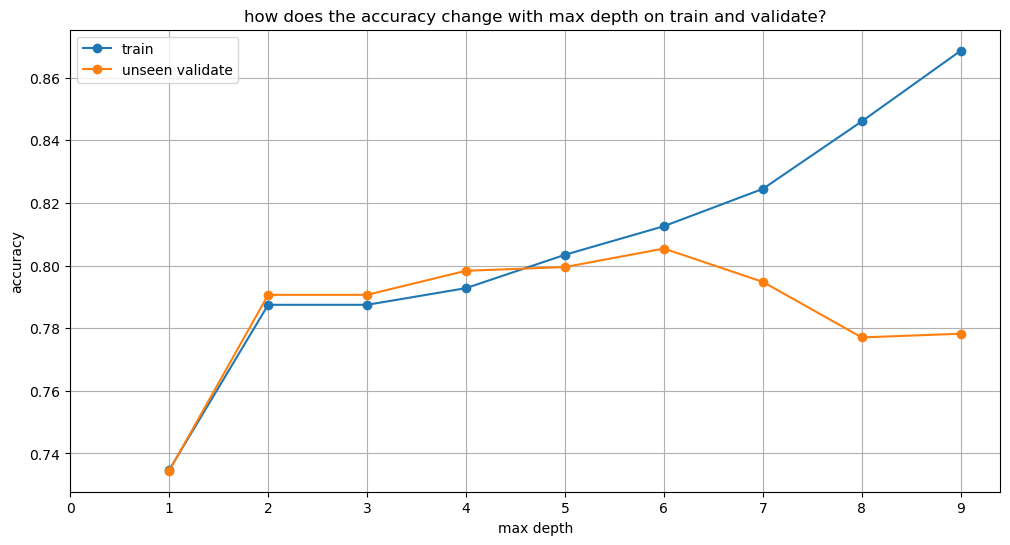

In [25]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='unseen validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.xticks(np.arange(0,10,1))
plt.grid()
plt.show()

>- Depth 5 is the best to use on test

#### Random Forest Model Type

>- Making the object
>- Fit the object
>- Transform the object

In [26]:
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy

0.7347197565305605

In [37]:
rf = m.get_rf(X_train, y_train)
rf

RandomForestClassifier()

In [28]:
m.get_rf_score(X_train, y_train)

0.9982247020035506

>- The Random Forest performs better than the baseline.

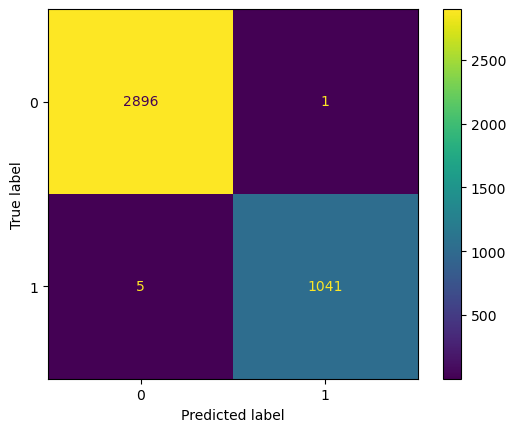

In [29]:
m.get_rf_cm(X_train, y_train)

In [38]:
m.get_rf_cr(rf, X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2897
           1       1.00      1.00      1.00      1046

    accuracy                           1.00      3943
   macro avg       1.00      1.00      1.00      3943
weighted avg       1.00      1.00      1.00      3943



In [39]:
m.get_rf_accuracy(rf, X_train, y_train)

Accuracy: 0.9982247020035506

True Positive Rate/Sensitivity/Recall/Power: 0.997131931166348
False Positive Rate/False Alarm Ratio/Fall-out: 0.001380738695201933
True Negative Rate/Specificity/Selectivity: 0.9986192613047981
False Negative Rate/Miss Rate: 0.0028680688336520078

Precision/PPV: 0.9961795606494747
F1 Score: 0.9966555183946489

Support (0): 1046
Support (1): 2897


In [48]:
m.get_rf_train_val_acc(rf, X_train, y_train, X_validate, y_validate, scores_df)

min_samples_leaf,max_depth,train_acc,val_acc,difference
1,10,0.882069,0.803666,0.078403
2,9,0.849353,0.812537,0.036816
3,8,0.831600,0.807806,0.023794
4,7,0.819173,0.810171,0.009002
5,6,0.803956,0.802484,0.001473
6,5,0.801674,0.804258,-0.002584
7,4,0.794826,0.802484,-0.007657
8,3,0.780624,0.780012,0.000612
9,2,0.754755,0.754583,0.000172
10,1,0.734720,0.734477,0.000243


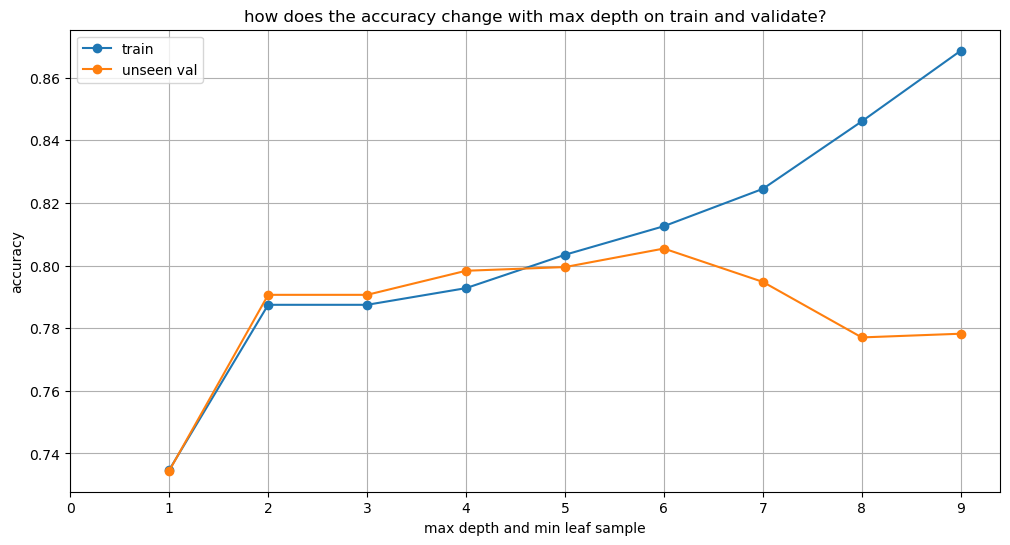

In [49]:
m.get_rf_plot(scores_df)

>- The model that has a max depth of 2 with min samples leaf is the best model to use. 

#### Logistic Regression Model Type

In [42]:
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy

0.7347197565305605

In [43]:
logit = LogisticRegression(class_weight='balanced')
logit.fit(X_train, y_train)
logit.score(X_train, y_train)

0.751965508496069

>- The logistic Regression model performs better than the baseline using the hyperparameter class weight = 'balanced'.

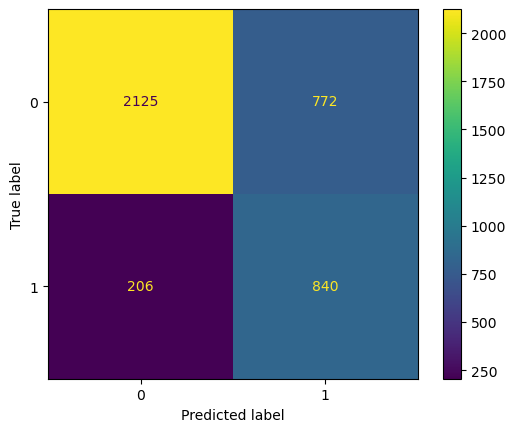

In [44]:
plot_confusion_matrix(logit, X_train, y_train)

In [45]:
#conf matrix
y_pred_lg = logit.predict(X_train)
cm_lg = confusion_matrix(y_train, y_pred_lg) #rows, columns

In [46]:
y_pred_lg = logit.predict(X_train)
print(f'{classification_report(y_train, y_pred_lg)}')

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      2897
           1       0.52      0.80      0.63      1046

    accuracy                           0.75      3943
   macro avg       0.72      0.77      0.72      3943
weighted avg       0.81      0.75      0.76      3943



## Conclusion

### Summery

### Recommendations

In [47]:
predictions_df = w.get_predictions_df(rf,X_test,test)
predictions_df

,customer_id,probability_of_churn,prediction_of_churn
0,4531-AUZNK,0.21,not_churn
1,2296-DKZFP,0.02,not_churn
2,9692-TUSXH,0.57,churn
3,5129-JLPIS,0.45,not_churn
4,1273-MTETI,0.84,churn
...,...,...,...
1404,1597-FZREH,0.40,not_churn
1405,9117-SHLZX,0.58,churn
1406,8441-SHIPE,0.00,not_churn
1407,3511-BFTJW,0.02,not_churn


### Next Steps